# Natural Language Processing 

For this project, you will be using data from GitHub repository README files. The goal will be to build a model that can predict them main programming language of a repository, given the text of the README file.

### Import Libraries

In [1]:
# Import standard python libraries
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import base_acquire
from base_acquire import scrape_github_data
import wrangle
from wrangle import basic_clean, tokenize, stem, lemmatize, remove_stopwords, prep_article_data, clean

import unicodedata
import re
import json

import nltk
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.corpus import stopwords

# set up some basic matplotlib style parameters
plt.rc('figure', figsize=(13, 7))
plt.style.use('seaborn-darkgrid')

# Planning

- Data Science Pipeline
- Stakeholders --> public
- Deliverables:
    - Git hub Repo
    - Google SpeadSheet
    - Final Report
    - Explore.py file
    - Acquire.py

# Acquire Data

### Get raw data

In [2]:
# Acquire raw data

original_readme = scrape_github_data()

#### Convert Raw Data --> JSON --> Pandas DF 

In [3]:
df = pd.DataFrame(original_readme)
df

,repo,language,readme_contents
0,ccxt/ccxt,JavaScript,# CCXT – CryptoCurrency eXchange Trading Libra...
1,openssl/openssl,C,Engines\n=======\n\nDeprecation Note\n--------...
2,HelloZeroNet/ZeroNet,JavaScript,# ZeroNet [![Build Status](https://travis-ci.o...
3,freqtrade/freqtrade,Python,# ![freqtrade](https://raw.githubusercontent.c...
4,amark/gun,JavaScript,"<p id=""readme""><a href=""https://gun.eco/""><img..."
...,...,...,...
127,microsoft/winget-cli,C++,# Windows Package Manager Client \n\nThis repo...
128,IntelLabs/control-flag,C++,**A friendly request: Thanks for visiting cont...
129,onnx/onnx,C++,<!--- SPDX-License-Identifier: Apache-2.0 -->\...
130,catchorg/Catch2,C++,"<a id=""top""></a>\n![Catch2 logo](data/artwork/..."


# Prepare Data

In [18]:
df.shape

(132, 7)

In [21]:
# df information summary
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 132 entries, 0 to 131
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   repo             132 non-null    object
 1   language         132 non-null    object
 2   readme_contents  132 non-null    object
 3   clean            132 non-null    object
 4   stemmed          132 non-null    object
 5   lemmatized       132 non-null    object
 6   clean_content    132 non-null    object
dtypes: object(7)
memory usage: 8.2+ KB


In [22]:
# Df describe summary
df.describe()

,repo,language,readme_contents,clean,stemmed,lemmatized,clean_content
count,132,132,132,132,132,132,132
unique,129,24,129,129,129,129,129
top,data-edu/data-science-in-education,javascript,# data science in education using r <img src='...,data science education using r img srcmanfigur...,data scienc educ use r img srcmanfigureslogopn...,data science education using r img srcmanfigur...,data science education using r img srcmanfigur...
freq,2,26,2,2,2,2,2


In [12]:
# Check for nulls 

df.isna().sum()

repo               0
language           0
readme_contents    0
clean              0
stemmed            0
lemmatized         0
dtype: int64

In [14]:
# Check nulls with languages

df.language.isna().any()

False

In [11]:
# Drop nulls if any (nulls non-existed)

df = df.dropna()

In [10]:
# Call the prepare function and create extra columns

prep_article_data(df, 'readme_contents', extra_words = [''], exclude_words = ['']).head()

,language,readme_contents,clean,stemmed,lemmatized
0,JavaScript,# CCXT – CryptoCurrency eXchange Trading Libra...,ccxt cryptocurrency exchange trading library b...,ccxt cryptocurr exchang trade librari build st...,ccxt cryptocurrency exchange trading library b...
1,C,Engines\n=======\n\nDeprecation Note\n--------...,engines deprecation note engine api introduced...,engin deprec note engin api wa introduc openss...,engine deprecation note engine api wa introduc...
2,JavaScript,# ZeroNet [![Build Status](https://travis-ci.o...,zeronet build statushttpstravisciorghellozeron...,zeronet build statushttpstravisciorghellozeron...,zeronet build statushttpstravisciorghellozeron...
3,Python,# ![freqtrade](https://raw.githubusercontent.c...,freqtradehttpsrawgithubusercontentcomfreqtrade...,freqtradehttpsrawgithubusercontentcomfreqtrade...,freqtradehttpsrawgithubusercontentcomfreqtrade...
4,JavaScript,"<p id=""readme""><a href=""https://gun.eco/""><img...",p idreadmea hrefhttpsgunecoimg width40 srchttp...,p idreadmea hrefhttpsgunecoimg width40 srchttp...,p idreadmea hrefhttpsgunecoimg width40 srchttp...


### Add clean column

In [16]:
df['clean_content'] = df.readme_contents.apply(clean).apply(' '.join)

df.head()

,repo,language,readme_contents,clean,stemmed,lemmatized,clean_content
0,ccxt/ccxt,JavaScript,# CCXT – CryptoCurrency eXchange Trading Libra...,ccxt cryptocurrency exchange trading library b...,ccxt cryptocurr exchang trade librari build st...,ccxt cryptocurrency exchange trading library b...,ccxt cryptocurrency exchange trading library b...
1,openssl/openssl,C,Engines\n=======\n\nDeprecation Note\n--------...,engines deprecation note engine api introduced...,engin deprec note engin api wa introduc openss...,engine deprecation note engine api wa introduc...,engine deprecation note engine api introduced ...
2,HelloZeroNet/ZeroNet,JavaScript,# ZeroNet [![Build Status](https://travis-ci.o...,zeronet build statushttpstravisciorghellozeron...,zeronet build statushttpstravisciorghellozeron...,zeronet build statushttpstravisciorghellozeron...,zeronet build statushttpstravisciorghellozeron...
3,freqtrade/freqtrade,Python,# ![freqtrade](https://raw.githubusercontent.c...,freqtradehttpsrawgithubusercontentcomfreqtrade...,freqtradehttpsrawgithubusercontentcomfreqtrade...,freqtradehttpsrawgithubusercontentcomfreqtrade...,freqtradehttpsrawgithubusercontentcomfreqtrade...
4,amark/gun,JavaScript,"<p id=""readme""><a href=""https://gun.eco/""><img...",p idreadmea hrefhttpsgunecoimg width40 srchttp...,p idreadmea hrefhttpsgunecoimg width40 srchttp...,p idreadmea hrefhttpsgunecoimg width40 srchttp...,p idreadmea hrefhttpsgunecoimg width40 srchttp...


### Lower case all df

In [17]:
# Lower case all df

df = df.apply(lambda col: col.str.lower())
df.head()

,repo,language,readme_contents,clean,stemmed,lemmatized,clean_content
0,ccxt/ccxt,javascript,# ccxt – cryptocurrency exchange trading libra...,ccxt cryptocurrency exchange trading library b...,ccxt cryptocurr exchang trade librari build st...,ccxt cryptocurrency exchange trading library b...,ccxt cryptocurrency exchange trading library b...
1,openssl/openssl,c,engines\n=======\n\ndeprecation note\n--------...,engines deprecation note engine api introduced...,engin deprec note engin api wa introduc openss...,engine deprecation note engine api wa introduc...,engine deprecation note engine api introduced ...
2,hellozeronet/zeronet,javascript,# zeronet [![build status](https://travis-ci.o...,zeronet build statushttpstravisciorghellozeron...,zeronet build statushttpstravisciorghellozeron...,zeronet build statushttpstravisciorghellozeron...,zeronet build statushttpstravisciorghellozeron...
3,freqtrade/freqtrade,python,# ![freqtrade](https://raw.githubusercontent.c...,freqtradehttpsrawgithubusercontentcomfreqtrade...,freqtradehttpsrawgithubusercontentcomfreqtrade...,freqtradehttpsrawgithubusercontentcomfreqtrade...,freqtradehttpsrawgithubusercontentcomfreqtrade...
4,amark/gun,javascript,"<p id=""readme""><a href=""https://gun.eco/""><img...",p idreadmea hrefhttpsgunecoimg width40 srchttp...,p idreadmea hrefhttpsgunecoimg width40 srchttp...,p idreadmea hrefhttpsgunecoimg width40 srchttp...,p idreadmea hrefhttpsgunecoimg width40 srchttp...


# Explore

## Initial Questions

- What are the most common words in READMEs?
- Does the length of the README vary by programming language?
- Do different programming languages use a different number of unique words?
- Are there any words that uniquely identify a programming language?

In [26]:
# Top 20 most common language

df.language.value_counts()

javascript          26
python              23
html                19
c++                 16
jupyter notebook    12
java                 6
c                    5
ruby                 3
c#                   2
go                   2
typescript           2
tex                  2
matlab               2
shell                2
groff                1
r                    1
css                  1
g-code               1
kotlin               1
swift                1
mathematica          1
assembly             1
php                  1
objective-c          1
Name: language, dtype: int64

In [35]:
# Lest 20 popular languages

df.language.value_counts().tail(20)

jupyter notebook    12
java                 6
c                    5
ruby                 3
c#                   2
go                   2
typescript           2
tex                  2
matlab               2
shell                2
groff                1
r                    1
css                  1
g-code               1
kotlin               1
swift                1
mathematica          1
assembly             1
php                  1
objective-c          1
Name: language, dtype: int64

### Visualize Distribution of program language

Text(0.5, 1.0, 'Programming Language Distribution')

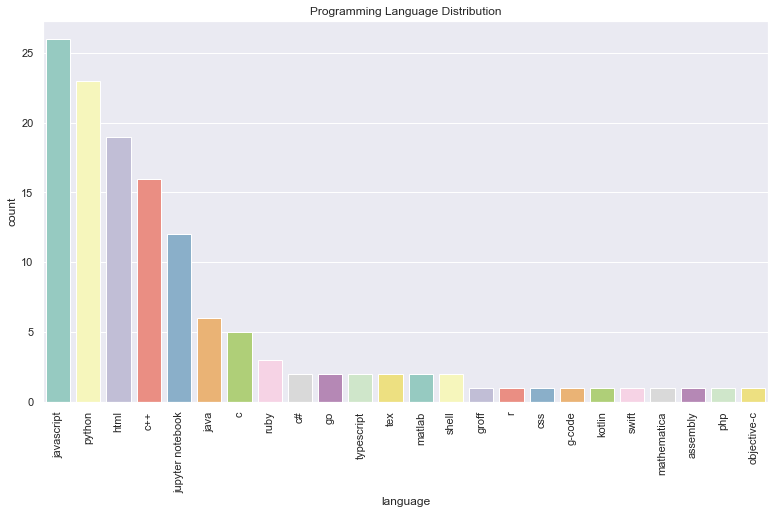

In [53]:
sns.set_theme(style="darkgrid")
titanic = sns.load_dataset("titanic")
ax = sns.countplot(x="language", data=df, palette="Set3",order = df['language'].value_counts().index)
ax.tick_params(axis='x', rotation=90)
ax.set_title("Programming Language Distribution")

### Q1 What are the most common words in READMEs?


In [36]:
df.language.unique()

array(['javascript', 'c', 'python', 'c++', 'swift', 'java', 'c#', 'php',
       'go', 'typescript', 'assembly', 'mathematica', 'html', 'css',
       'shell', 'kotlin', 'g-code', 'ruby', 'r', 'jupyter notebook',
       'matlab', 'tex', 'groff', 'objective-c'], dtype=object)

In [37]:
javascript_words = clean(' '.join(df[df.language == 'javascript'].clean_content))
c_words = clean(' '.join(df[df.language == 'c'].clean_content))
python_words = clean(' '.join(df[df.language == 'python'].clean_content))

c_plus_plus_words = clean(' '.join(df[df.language == 'c++'].clean_content))
swift_words = clean(' '.join(df[df.language == 'swift'].clean_content))
java_words = clean(' '.join(df[df.language == 'java'].clean_content))
c_sharp_words = clean(' '.join(df[df.language == 'c#'].clean_content))
go_words = clean(' '.join(df[df.language == 'go'].clean_content))
typescript_words = clean(' '.join(df[df.language == 'typescript'].clean_content))
mathematica_words = clean(' '.join(df[df.language == 'mathematica'].clean_content))
html_words = clean(' '.join(df[df.language == 'javascript'].clean_content))
css_words = clean(' '.join(df[df.language == 'css'].clean_content))
shell_words = clean(' '.join(df[df.language == 'shell'].clean_content))
kotlin_words = clean(' '.join(df[df.language == 'kotlin'].clean_content))
g_code_words = clean(' '.join(df[df.language == 'g-code'].clean_content))
ruby_words = clean(' '.join(df[df.language == 'ruby'].clean_content))
r_words = clean(' '.join(df[df.language == 'r'].clean_content))
jn_words = clean(' '.join(df[df.language == 'jupyter notebook'].clean_content))
matlab_words = clean(' '.join(df[df.language == 'matlab'].clean_content))
tex_words = clean(' '.join(df[df.language == 'tex'].clean_content))
groff_words = clean(' '.join(df[df.language == 'groff'].clean_content))
objective_c_words = clean(' '.join(df[df.language == 'objective-c'].clean_content))

all_words = clean(' '.join(df.clean_content))

### Word Frequencies

In [38]:
javascript_frequency = pd.Series(javascript_words).value_counts()


In [39]:
# splitting the entire sub-corpus of total words in a class type by spaces,
# turning the list output by split into a Series, then getting that value_counts()
javascript_frequency = pd.Series(javascript_words).value_counts()
c_frequency = pd.Series(c_words).value_counts()
python_frequency = pd.Series(python_words).value_counts()
c_plus_plus_frequency = pd.Series(c_plus_plus_words).value_counts()
swift_frequency = pd.Series(swift_words).value_counts()
java_frequency = pd.Series(java_words).value_counts()
c_sharp_frequency = pd.Series(c_sharp_words).value_counts()

go_frequency = pd.Series(go_words).value_counts()
typescript_frequency = pd.Series(typescript_words).value_counts()
mathematica_frequency = pd.Series(mathematica_words).value_counts()
html_frequency = pd.Series(html_words).value_counts()
css_frequency = pd.Series(css_words).value_counts()

shell_frequency = pd.Series(shell_words).value_counts()
kotlin_frequency = pd.Series(kotlin_words).value_counts()
g_code_frequency = pd.Series(g_code_words).value_counts()
ruby_frequency = pd.Series(ruby_words).value_counts()
r_frequency = pd.Series(r_words).value_counts()
jn_frequency = pd.Series(jn_words).value_counts()
matlab_frequency = pd.Series(matlab_words).value_counts()
tex_frequency = pd.Series(tex_words).value_counts()
groff_frequency = pd.Series(groff_words).value_counts()
objective_c_frequency = pd.Series(objective_c_words).value_counts()

all_words = pd.Series(all_words).value_counts()

In [40]:
# concat all frequencies together into a dataframe

word_counts = pd.concat([all_words, javascript_frequency, c_frequency, python_frequency, c_plus_plus_frequency,\
                         swift_frequency,java_frequency,c_sharp_frequency,\
                       go_frequency,typescript_frequency,mathematica_frequency,html_frequency,\
                         css_frequency,shell_frequency,kotlin_frequency,g_code_frequency,ruby_frequency,\
                       r_frequency,jn_frequency,matlab_frequency,tex_frequency,groff_frequency,\
                         objective_c_frequency], axis=1).fillna(0).astype(int)


word_counts.columns = ['all_words','javascript','c', 'python', 'c_plus_plus', 'swift','java','c_sharp',\
                       'go','typescript','mathematica','html','css','shell','kotlin','g_code','ruby',\
                       'r','jupyter_nb','matlab','tex','groff','objective_c']

### 20 Most frequently occuring words

In [41]:
word_counts.sort_values(by ='all_words', ascending = False).head(20)

,all_words,javascript,c,python,c_plus_plus,swift,java,c_sharp,go,typescript,...,shell,kotlin,g_code,ruby,r,jupyter_nb,matlab,tex,groff,objective_c
data,623,73,18,63,31,25,18,4,1,4,...,6,3,2,45,17,35,3,0,1,1
version,410,179,16,19,43,16,16,3,24,12,...,18,0,0,13,0,6,11,0,1,5
use,401,91,40,61,52,18,14,8,8,13,...,1,0,3,16,0,22,12,2,0,6
run,343,106,23,34,41,2,16,10,9,34,...,2,0,0,10,0,19,1,0,1,9
code,333,61,37,37,70,5,11,9,3,6,...,1,0,0,11,0,18,5,2,1,1
project,316,59,8,68,34,7,8,3,6,3,...,6,0,0,6,0,27,0,0,0,18
build,309,65,51,11,87,8,12,8,11,7,...,0,0,0,35,0,3,0,0,0,0
using,299,78,29,34,26,3,10,3,10,14,...,2,2,1,8,9,21,4,1,0,3
install,296,85,9,68,59,1,4,11,8,10,...,6,0,0,6,0,9,0,0,0,2
file,292,60,43,26,39,3,15,13,12,4,...,7,1,1,6,0,11,2,0,0,4


### 20 Least Occuring Words

In [42]:
word_counts.sort_values(by ='all_words', ascending = False).tail(20)

,all_words,javascript,c,python,c_plus_plus,swift,java,c_sharp,go,typescript,...,shell,kotlin,g_code,ruby,r,jupyter_nb,matlab,tex,groff,objective_c
instructionshttppsicodeorgpsi4manual11condahtmlhowtoinstallapsi4binaryintoananaminicondadistribution,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
objdirstagetabtabbinpsi4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
jgetconf,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
objdir,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
refresher,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
numbered,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ranging,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
tuples,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
srchttpsimgshieldsiogithubreleasedatepsi4psi4numpysvg,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
richard,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


### Q4 Words that uniquely identify programming language 

In [43]:
pd.concat([word_counts[word_counts.javascript == 0].sort_values(by='python').head(6),
           word_counts[word_counts.python == 0].sort_values(by='javascript').head(6)])


,all_words,javascript,c,python,c_plus_plus,swift,java,c_sharp,go,typescript,...,shell,kotlin,g_code,ruby,r,jupyter_nb,matlab,tex,groff,objective_c
10146,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
datahttpscoronavirusdatagovuk,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
irelandhttpswwwnisragovukpublicationsweeklydeaths,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
datahttpswwwnrscotlandgovukcovid19stats,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
datahttpspublictableaucomprofilepublichealthwaleshealthprotectionvizhomerapidcovid19virologypublicheadlinesummary,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
numberhttpswwwgovukgovernmentnewsgovernmentpublisheslatestrnumber,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
incorrectly,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
reversestringjava,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
kthlargestelementinanarrayjava,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
divideandconquer,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Visualize

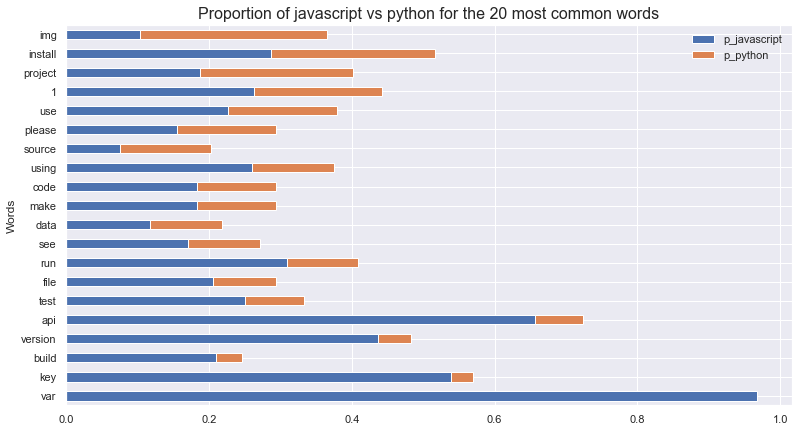

In [47]:
# figure out the percentage of spam vs ham
(word_counts
 .assign(p_javascript = word_counts.javascript / word_counts['all_words'],
         p_python = word_counts.python / word_counts['all_words'])
 .sort_values(by = 'all_words')
 [['p_javascript', 'p_python']]
 .tail(20)
 .sort_values('p_python')
 .plot.barh(stacked = True))

plt.title('Proportion of javascript vs python for the 20 most common words', size = 16)
plt.ylabel('Words')
plt.show()

In [48]:
(word_counts
 [(word_counts.javascript > 10) & (word_counts.python > 10)]
 .assign(ratio=lambda df: df.javascript / (df.javascript + .01))
 .sort_values(by='ratio')
 .pipe(lambda df: pd.concat([df.head(), df.tail()])))

,all_words,javascript,c,python,c_plus_plus,swift,java,c_sharp,go,typescript,...,kotlin,g_code,ruby,r,jupyter_nb,matlab,tex,groff,objective_c,ratio
date,69,11,1,21,4,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0.999092
information,105,11,9,16,14,2,8,2,5,6,...,0,0,11,2,4,2,1,0,0,0.999092
dependency,96,11,6,12,27,3,17,4,3,3,...,0,0,0,0,2,0,0,0,0,0.999092
way,54,11,8,13,5,1,4,2,0,1,...,0,0,1,0,1,0,0,0,0,0.999092
list,77,11,7,14,13,0,6,0,2,0,...,1,0,3,0,0,1,0,0,2,0.999092
install,296,85,9,68,59,1,4,11,8,10,...,0,0,6,0,9,0,0,0,2,0.999882
use,401,91,40,61,52,18,14,8,8,13,...,0,3,16,0,22,12,2,0,6,0.999890
run,343,106,23,34,41,2,16,10,9,34,...,0,0,10,0,19,1,0,1,9,0.999906
version,410,179,16,19,43,16,16,3,24,12,...,0,0,13,0,6,11,0,1,5,0.999944
api,279,183,18,19,4,0,19,2,0,8,...,0,0,11,0,0,0,0,0,1,0.999945


## Word Clouds 

In [49]:
# Import WordCloud Library

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [50]:
all_cloud = WordCloud(background_color='white', height=1000, width=400).generate(' '.join(all_words))
javascript_cloud = WordCloud(background_color='white', height=600, width=800).generate(' '.join(javascript_words))
python_cloud = WordCloud(background_color='white', height=600, width=800).generate(' '.join(python_words))

plt.figure(figsize=(10, 8))
axs = [plt.axes([0, 0, .5, 1]), plt.axes([.5, .5, .5, .5]), plt.axes([.5, 0, .5, .5])]

axs[0].imshow(all_cloud)
axs[1].imshow(javascript_cloud)
axs[2].imshow(python_cloud)

axs[0].set_title('All Words')
axs[1].set_title('Javascript')
axs[2].set_title('Python')

for ax in axs: ax.axis('off')

TypeError: sequence item 0: expected str instance, int found

## Bigrams

#### Top 20 word by most common programming language:

In [51]:
top_20_javascript_bigrams = (pd.Series(nltk.ngrams(javascript_words, 2))
                      .value_counts()
                      .head(20))
top_20_python_bigrams = (pd.Series(nltk.ngrams(python_words, 2))
                      .value_counts()
                      .head(20))
top_20_c_plus_plus_bigrams = (pd.Series(nltk.ngrams(c_plus_plus_words, 2))
                      .value_counts()
                      .head(20))
top_20_swift_bigrams = (pd.Series(nltk.ngrams(swift_words, 2))
                      .value_counts()
                      .head(20))
top_20_java_bigrams = (pd.Series(nltk.ngrams(java_words, 2))
                      .value_counts()
                      .head(20))

print(f'JAVASCRIPT Bigram Words\n\n {top_20_javascript_bigrams}')
print(f'\n\nPYTHON Bigram Words\n\n {top_20_python_bigrams}')
print(f'\n\nC++ Bigram Words\n\n {top_20_python_bigrams}')
print(f'\n\nSWIFT Bigram Words\n\n {top_20_swift_bigrams}')
print(f'\n\nJAVA Bigram Words\n\n {top_20_java_bigrams}')

JAVASCRIPT Bigram Words

 (api, version)                                                                                         131
(ccxt, prohttpsimgshieldsiobadgeccxtproblackhttpsccxtpro)                                               54
(ccxt, certifiedhttpsimgshieldsiobadgeccxtcertifiedgreensvghttpsgithubcomccxtccxtwikicertification)     30
(__examples__, j)                                                                                       28
(certifiedhttpsimgshieldsiobadgeccxtcertifiedgreensvghttpsgithubcomccxtccxtwikicertification, ccxt)     28
(united, state)                                                                                         25
(npm, install)                                                                                          22
(npm, run)                                                                                              21
(state, configuration)                                                                                  20
(nasa, manu

#### Least common 20 words by programming Language:

In [52]:
top_20_javascript_bigrams = (pd.Series(nltk.ngrams(javascript_words, 2))
                      .value_counts()
                      .tail(20))
top_20_python_bigrams = (pd.Series(nltk.ngrams(python_words, 2))
                      .value_counts()
                      .tail(20))
top_20_c_plus_plus_bigrams = (pd.Series(nltk.ngrams(c_plus_plus_words, 2))
                      .value_counts()
                      .tail(20))
top_20_swift_bigrams = (pd.Series(nltk.ngrams(swift_words, 2))
                      .value_counts()
                      .tail(20))
top_20_java_bigrams = (pd.Series(nltk.ngrams(java_words, 2))
                      .value_counts()
                      .tail(20))

print(f'JAVASCRIPT Bigram Words\n\n {top_20_javascript_bigrams}')
print(f'\n\nPYTHON Bigram Words\n\n {top_20_python_bigrams}')
print(f'\n\nC++ Bigram Words\n\n {top_20_python_bigrams}')
print(f'\n\nSWIFT Bigram Words\n\n {top_20_swift_bigrams}')
print(f'\n\nJAVA Bigram Words\n\n {top_20_java_bigrams}')

JAVASCRIPT Bigram Words

 (requirenodeforge, var)               1
(var, f)                              1
(f, requirefs)                        1
(requirefs, openssl)                  1
(des3, inputtxt)                      1
(inputtxt, inputenc)                  1
(inputenc, function)                  1
(function, encryptpassword)           1
(encryptpassword, var)                1
(input, fsreadfilesyncinputtxt)       1
(fsreadfilesyncinputtxt, encoding)    1
(binary, 3des)                        1
(8, get)                              1
(get, derived)                        1
(derived, byte)                       1
(byte, note)                          1
(note, 1)                             1
(1, using)                            1
(using, alternative)                  1
(password, admin)                     1
dtype: int64


PYTHON Bigram Words

 (much, galactic)        1
(hole, much)            1
(even, large)           1
(possibly, even)        1
(ring, gas)             1
(galaxy